<h1 style='text-align: center'>Explore IU-XRay Dataset</h1>

In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from dataset import IUXrayDataset, custom_collate

**Load dataset:**

In [2]:
data_dir = '../data/IU-XRay'

train_dataset = IUXrayDataset(data_dir, image_size=256, is_train=True, max_samples=6723)
val_dataset = IUXrayDataset(data_dir, image_size=256, is_train=False, max_samples=1496)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

2025-04-19 00:55:52,039 - INFO - Loaded 7470 samples
2025-04-19 00:55:55,520 - INFO - Loaded 7470 samples


Train dataset size: 6723
Validation dataset size: 747


In [3]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True, collate_fn=custom_collate)

**Distribution of the pixel values after transformation:**

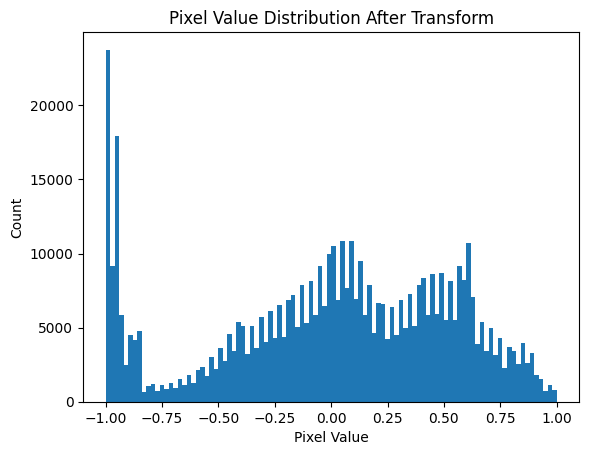

In [4]:
images = next(iter(val_loader))['pixel_values'] 
images = images.flatten().numpy() 

plt.hist(images, bins=100)
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.title('Pixel Value Distribution After Transform')
plt.show()

**Visualize the caption-image pair**

In [5]:
def show_batch(batch):
    images = batch['pixel_values']
    captions = batch['caption']
    mesh_terms = batch['mesh_terms']
    
    images = images.cpu().numpy()
    images = np.transpose(images, (0, 2, 3, 1))  # BCHW -> BHWC
    images = ((images + 1) / 2 * 255).astype(np.uint8)  # [-1,1] -> [0,255]
    
    fig, axes = plt.subplots(nrows=len(images), ncols=1, figsize=(10, 4*len(images)))
    
    for i, (img, cap, terms) in enumerate(zip(images, captions, mesh_terms)):
        if len(images) == 1:
            ax = axes
        else:
            ax = axes[i]
        
        ax.imshow(img[:,:,0], cmap='gray')
        ax.set_title(f"Caption: {cap[:100]}...", fontsize=10)
        ax.set_xlabel(f"MeSH Terms: {', '.join(terms)}", fontsize=8)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()

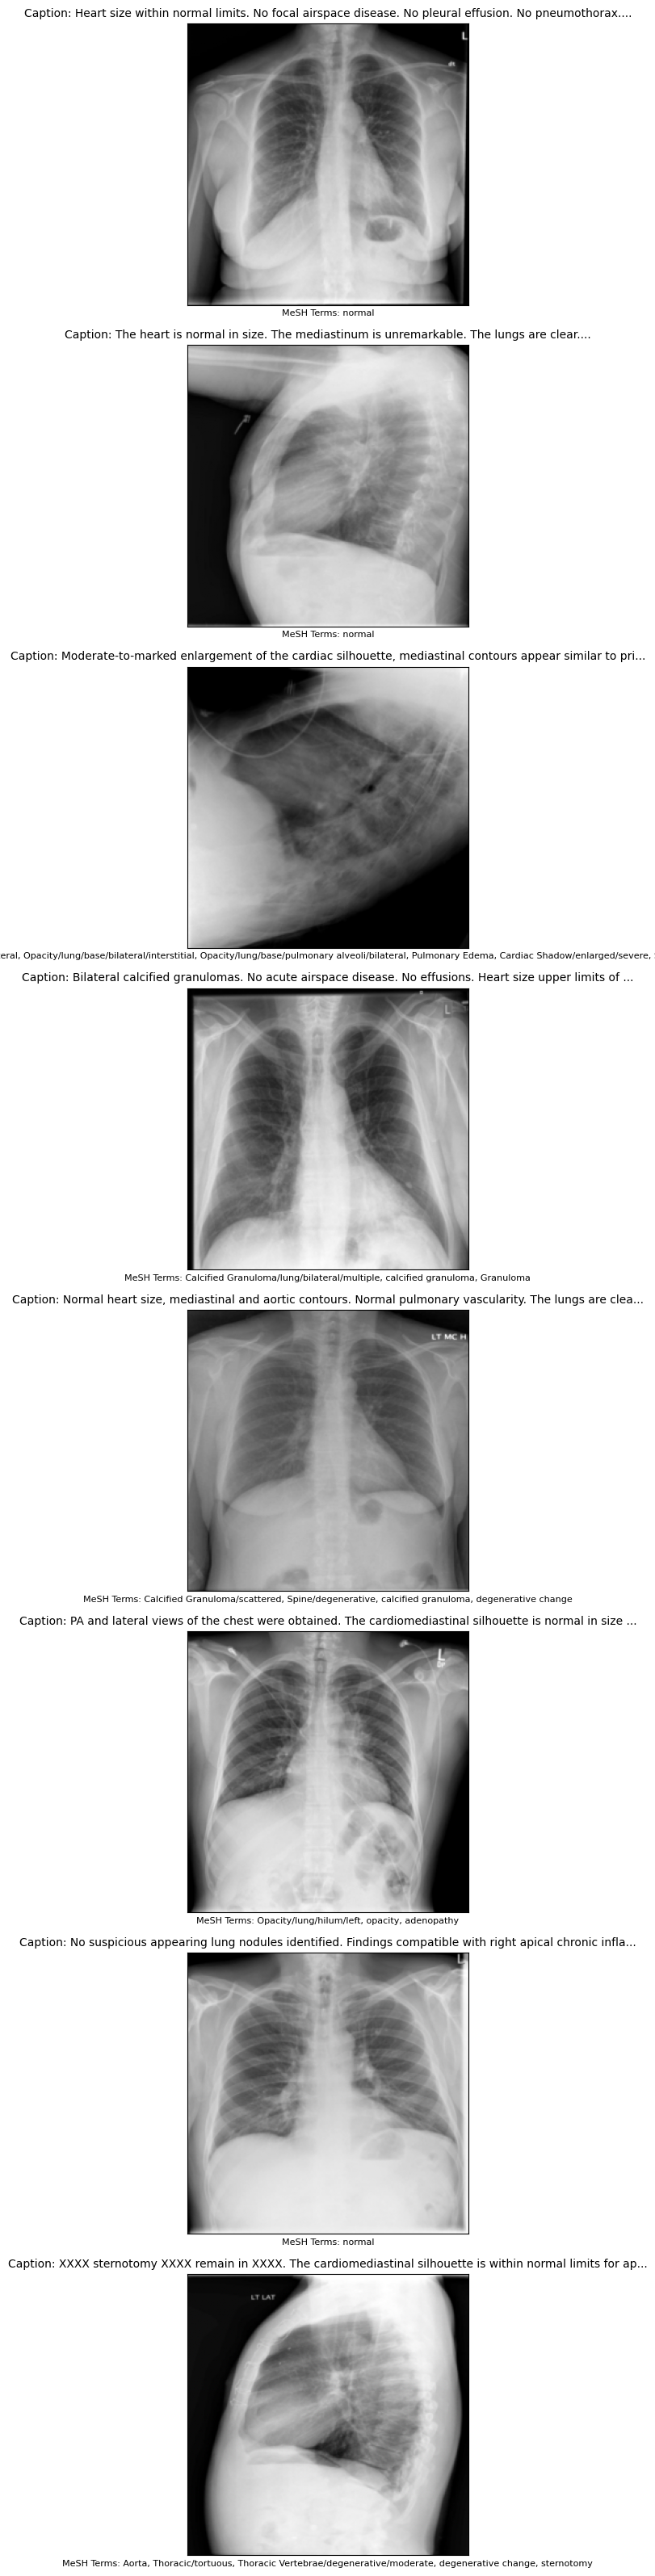

In [6]:
for batch in val_loader:
    show_batch(batch)
    break

**Sample report:**

In [7]:
for batch in train_loader:
    print("Sample Report:")
    print(batch['report'][0][:500] + "...")
    break

Sample Report:
Radiograph chest PA and Lateral XXXX, XXXX. 786.50 hypertension. The heart is normal in size and contour. There is no mediastinal widening. The lungs are clear bilaterally. No pleural effusion or pneumothorax. XXXX are intact. No acute cardiopulmonary abnormalities. ...


**Distribution of caption lengths:**


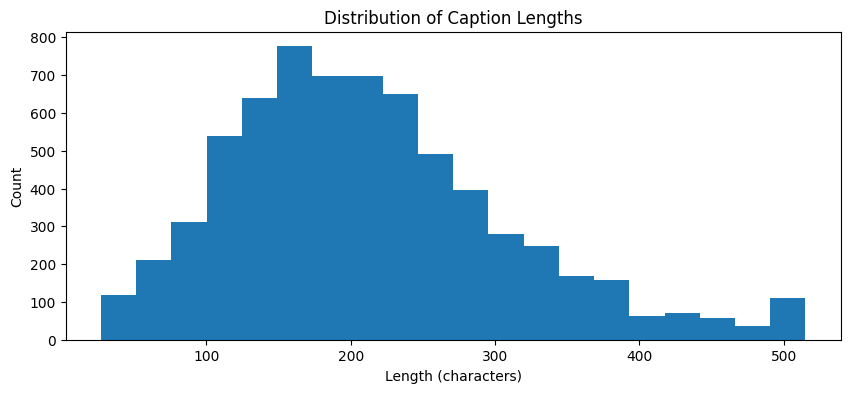

In [8]:
caption_lengths = [len(sample['caption']) for sample in train_dataset.samples]
plt.figure(figsize=(10, 4))
plt.hist(caption_lengths, bins=20)
plt.title('Distribution of Caption Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Count')
plt.show()

**Sample caption:**

In [9]:
print("Sample Captions:")
for i in range(min(5, len(train_dataset))):
    print(f"{i+1}. {train_dataset.samples[i]['caption'][:200]}...")

Sample Captions:
1. Heart size is normal and lungs are clear. Soft tissue density overlying the left lateral upper chest may represent the patient's lipoma....
2. Frontal and lateral views of the chest show an unchanged cardiomediastinal silhouette. Normal mediastinal contour, pulmonary XXXX and vasculature, central airways and lung volumes. No pleural effusion...
3. Normal heart size. Clear lungs. No pneumothorax. No pleural effusion....
4. Negative for cardiac enlargement or vascular congestion. Minimal subsegmental atelectasis at the left base otherwise negative for focal confluent airspace disease. The visualized bony structures are i...
5. Normal heart size. Clear lungs. No pneumothorax or pleural effusion....
